# QIF Analyses (Counting for topics popularity)

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt

### Experiment 10: Counting for topics popularity using binomial distribution

**For learning most popular topics.**

$$\sum_n^N \binom{N}{n} p^n (1-q)^{N-n} = \sum_n^N \binom{N}{n} A^n q^n (1-q)^{N-n}, A = \frac{p}{q}$$

$$
\begin{pmatrix}
  p & 1-p \\
  q & 1-q
\end{pmatrix}
$$

In [2]:
# Defines parameters of the model.
S = 5
M1 = 349
M2 = 629
R = 0.05
P1 = (1/S) * (1 - R) + (1/M1) * R
P2 = (1/S) * (1 - R) + (1/M2) * R
Q1 = (1/M1) * R
Q2 = (1/M2) * R
A1 = P1/Q1
A2 = P2/Q2

In [3]:
display("A1: " + str(P1/Q1) + "; q1: " + str(Q1))
display("A2: " + str(P2/Q2) + "; q2: " + str(Q2))

'A1: 1327.2; q1: 0.00014326647564469913'

'A2: 2391.2; q2: 7.949125596184421e-05'

In [4]:
%%time
expectation1 = []
expectation2 = []
for N in range(2,31):
    print("N: " + str(N))
    expect1 = binom.expect(lambda x: (A1**x)/(2**N), args=(N, Q1), lb=0, ub=N)
    expect2 = binom.expect(lambda x: (A2**x)/(2**N), args=(N, Q2), lb=0, ub=N)
    print("Expectation 1: " + str(expect1) + ". Expectation 2: " + str(expect2) + ".")
    if N == 2:
        expectation1.append(expect1)
        expectation2.append(expect2)
    elif N > 2:
        expectation1.append(expect1)
        expectation2.append(expect2)

N: 2
Expectation 1: 0.35402500000000015. Expectation 2: 0.35402500000000026.
N: 3
Expectation 1: 0.210644875. Expectation 2: 0.2106448749999999.
N: 4
Expectation 1: 0.125333700625. Expectation 2: 0.12533370062500002.
N: 5
Expectation 1: 0.07457355187187499. Expectation 2: 0.07457355187187505.
N: 6
Expectation 1: 0.04437126336376565. Expectation 2: 0.0443712633637656.
N: 7
Expectation 1: 0.02640090170144054. Expectation 2: 0.02640090170144058.
N: 8
Expectation 1: 0.01570853651235712. Expectation 2: 0.01570853651235713.
N: 9
Expectation 1: 0.009346579224852485. Expectation 2: 0.0093465792248525.
N: 10
Expectation 1: 0.005561214638787227. Expectation 2: 0.005561214638787231.
N: 11
Expectation 1: 0.003308922710078398. Expectation 2: 0.003308922710078401.
N: 12
Expectation 1: 0.0019688090124966506. Expectation 2: 0.0019688090124966493.
N: 13
Expectation 1: 0.0011714413624355066. Expectation 2: 0.0011714413624355048.
N: 14
Expectation 1: 0.0006970076106491272. Expectation 2: 0.00069700761064

In [5]:
display(expectation1, expectation2)

[0.35402500000000015,
 0.210644875,
 0.125333700625,
 0.07457355187187499,
 0.04437126336376565,
 0.02640090170144054,
 0.01570853651235712,
 0.009346579224852485,
 0.005561214638787227,
 0.003308922710078398,
 0.0019688090124966506,
 0.0011714413624355066,
 0.0006970076106491272,
 0.0004147195283362301,
 0.0002467581193600569,
 0.00014682108101923385,
 8.735854320644415e-05,
 5.1978333207834286e-05,
 3.09271082586614e-05,
 1.840162941390353e-05,
 1.0948969501272602e-05,
 6.514636853257191e-06,
 3.87620892768803e-06,
 2.3063443119743807e-06,
 1.3722748656247566e-06,
 8.165035450467309e-07,
 4.858196093028039e-07,
 2.8906266753516866e-07,
 1.7199228718342536e-07]

[0.35402500000000026,
 0.2106448749999999,
 0.12533370062500002,
 0.07457355187187505,
 0.0443712633637656,
 0.02640090170144058,
 0.01570853651235713,
 0.0093465792248525,
 0.005561214638787231,
 0.003308922710078401,
 0.0019688090124966493,
 0.0011714413624355048,
 0.0006970076106491269,
 0.00041471952833623037,
 0.0002467581193600571,
 0.00014682108101923383,
 8.735854320644418e-05,
 5.197833320783432e-05,
 3.092710825866138e-05,
 1.840162941390353e-05,
 1.0948969501272602e-05,
 6.514636853257197e-06,
 3.87620892768804e-06,
 2.3063443119743854e-06,
 1.3722748656247592e-06,
 8.165035450467284e-07,
 4.858196093028054e-07,
 2.8906266753516845e-07,
 1.7199228718342517e-07]

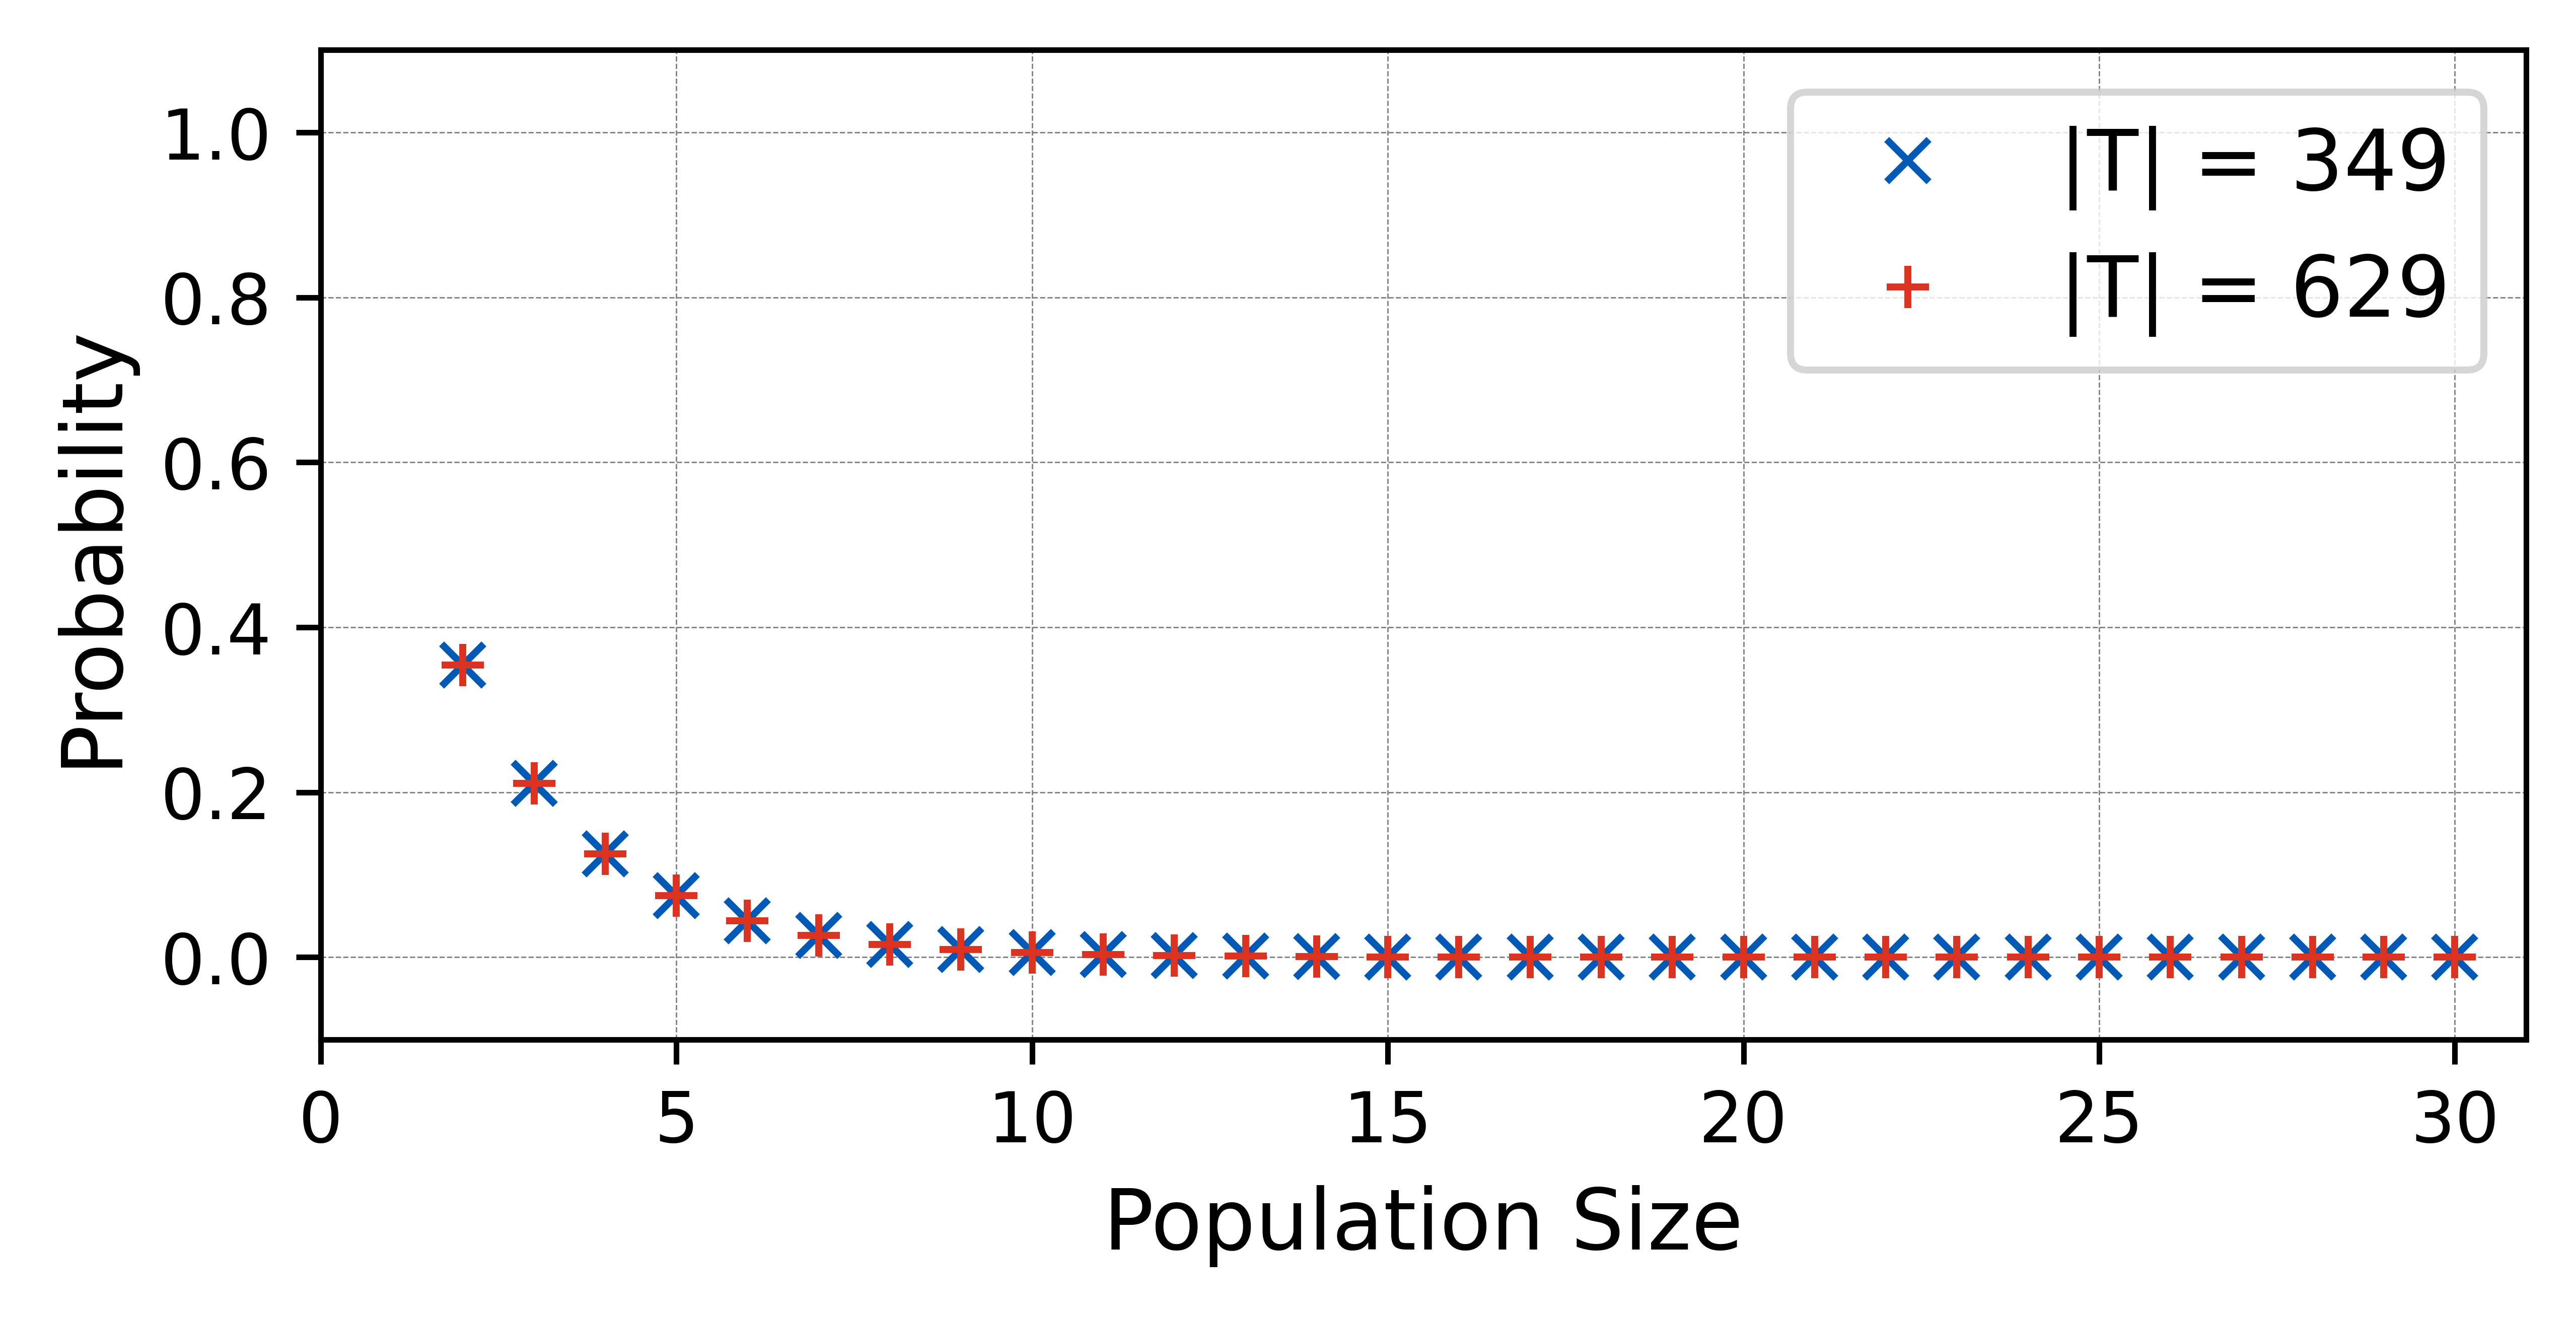

In [6]:
x = [x for x in range(2,31)]

plt.figure(figsize=(5, 2.5), layout='constrained', dpi=1000.00)

plt.xlabel("Population Size", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Probability", fontsize=12)
plt.yticks(fontsize=10)

plt.xlim(0, 31)
plt.ylim(-0.1, 1.1)

plt.grid(color='grey', linestyle='--', linewidth=0.2)

plt.plot(x, expectation1, color='#005AB5', marker='x', linestyle='', label="|T| = 349")
plt.plot(x, expectation2, color='#DC3220', marker='+', linestyle='', label="|T| = 629")
plt.legend(fontsize=12)

plt.show()